## Aluno: José Maria Clementino Junior NUSP: 11357281

### Entrega 2 : Visualização dos dados - (Link Repositório: https://github.com/clementinojr/SCC5836-Visualiza-o-Computacional)

##### Contextualização dos DataSet e das etapas:
  - DataSet
         - O trabalho utilizará  dois DataSet de imagens de Raio-X de pacientes, conforme demostrado na figura abaixo, uma das principais diferenças entre eles é a padronização da qualidade dos exames, quantidade de imagens e a privacidade dos dados. 
                  - (HC FMRP) Hospital das Clínicas da Faculdade de Medicina de Ribeirão Preto - Privado em parceria com o projeto temático (MIVisBD) - http://www.gbdi.icmc.usp.br/
                  - Kaggle: Base disponível em https://www.kaggle.com/tawsifurrahman/covid19-radiography-database

<img src="figuras/DataSet.png" width=1000 height=600 />

## A Entrega 2 é dividida em 2 etapas principais:
1. Apresentação das imagens sem a extração das características 
3. Preparação e visualização dos dados (Projeções)

==============================================================================================================================================================

#### Descrição das bibliotecas utilizadas
  - Bibliotecas utilizadas para o tratamento de imagens:
      - cv2 : OpenCv
      - PIL 
   - Bibliotecas utilizadas para a realizar a estração de caracteristicas das imagens:
      - glob
      - mahotas
      - from __future__ import division
      - convolve2d
   - Bibliotecas utilizadas para a manipulação de arquivos:
      - os
      - csv
   - Bibliotecas utilizadas para a controle de tempo:
      - time
      
   - Bibliotecas utilizadas para a manipulação e visualização dos dados:
      - pandas
      - matplotlib
      - numpy
      - seaborn
      
   - Bibliotecas utilizadas para a reducação de dimensionalidade e calculos de distâncias: 
       - sklearn

In [1]:
import cv2
import numpy as np
import os
import glob
import pandas as pd
from PIL import Image 
#import mahotas 
import matplotlib.pylab as plt
import csv
import time
import seaborn as sns
start_time = time.time()
from __future__ import division # Utilizado para LPQ ex
#from scipy.signal import convolve2d # # Utilizado para LPQ ex

In [2]:
import matplotlib.pyplot as plt #importing matplotlib

##  1.  Apresentação das imagens sem a extração das características 


In [3]:
# Inicialmente vamos fazer uma leitura de uma determinada imagem e apresenta-lá
img = plt.imread ('E:/DataSetCovid/COVID-19_Radiography_Dataset/COVID/COVID-169.png') #reads dados da imagem

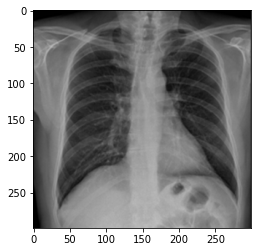

In [4]:
#Image original selecionada
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

No entanto, como o computador entende as imagens? 

- Basicamente, como um conjunto de pixels, ou seja, uma matriz de pixels. 
- O tamnaho do matriz é dada de acordo com a resolução da imagem. 
    - Como por exemplo se uma imagem 500x500 ela terá 250.000 pixels, 250 linhas por 250 colunas;
   

Abaixo é dada a representação de uma imagem em escala de cinza(foco do trabalho).
 - É possivel observar que cada valor de pixels representa a intensidade da cor (0, 255).
     - Quanto mais próximo de 0 é atribuito tom de preto.
     - Quanto mais próximo de 1 é atributo tom de branco. 

<img src="figuras/rep-img.jpg" width=1000 height=600 />

Após a leitura da imagem ela é apresentada como uma matriz= array numpy

In [5]:
type(img)

numpy.ndarray

Para saber o tamanho da imagem: Logoo uma imagem que tem 299 de largura e 299 de altura

In [6]:
img.shape

(299, 299)

Apenas passando o Array para o Dataframe, para facilitar a visualização da matriz 

In [7]:
df_show_image = pd.DataFrame(img)

In [8]:
df_show_image

,0,1,2,3,4,5,6,7,8,9,...,289,290,291,292,293,294,295,296,297,298
0,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.000000,0.003922,0.035294
1,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.000000,0.003922,0.027451
2,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.011765
3,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922
4,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.000000,0.003922,0.043137,...,0.290196,0.262745,0.243137,0.231373,0.223529,0.203922,0.184314,0.168627,0.141176,0.090196
295,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.000000,0.000000,0.039216,...,0.294118,0.262745,0.239216,0.231373,0.219608,0.203922,0.184314,0.164706,0.137255,0.094118
296,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.000000,0.000000,0.039216,...,0.294118,0.262745,0.239216,0.223529,0.215686,0.196078,0.176471,0.164706,0.137255,0.094118
297,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.000000,0.000000,0.043137,...,0.290196,0.258824,0.235294,0.219608,0.211765,0.192157,0.172549,0.160784,0.141176,0.098039


In [9]:
df_show_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Columns: 299 entries, 0 to 298
dtypes: float32(299)
memory usage: 349.3 KB


In [10]:
df_show_image.describe()

,0,1,2,3,4,5,6,7,8,9,...,289,290,291,292,293,294,295,296,297,298
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,...,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,0.231189,0.239216,0.248974,0.259348,0.271506,0.284385,0.296727,0.310906,0.323916,0.335235,...,0.396106,0.380223,0.365927,0.354805,0.348745,0.343144,0.335524,0.331156,0.307377,0.227359
std,0.185012,0.183266,0.181673,0.180151,0.177545,0.173712,0.169362,0.166690,0.164808,0.158607,...,0.116551,0.117136,0.115067,0.115096,0.117461,0.121725,0.125876,0.132039,0.129789,0.101520
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,...,0.000000,0.003922,0.000000,0.003922,0.003922,0.003922,0.003922,0.000000,0.000000,0.000000
25%,0.041176,0.117647,0.152941,0.168627,0.172549,0.186275,0.196078,0.211765,0.227451,0.239216,...,0.360784,0.337255,0.317647,0.301961,0.286275,0.266667,0.249020,0.231373,0.198039,0.133333
50%,0.176471,0.184314,0.196078,0.207843,0.223529,0.239216,0.250980,0.270588,0.286275,0.301961,...,0.388235,0.364706,0.349020,0.341176,0.337255,0.333333,0.325490,0.321569,0.298039,0.223529
75%,0.419608,0.423529,0.423529,0.425490,0.427451,0.435294,0.439216,0.443137,0.447059,0.454902,...,0.466667,0.462745,0.458824,0.454902,0.450980,0.435294,0.427451,0.421569,0.403922,0.294118
max,0.560784,0.588235,0.603922,0.611765,0.603922,0.596078,0.588235,0.603922,0.631373,0.647059,...,0.643137,0.639216,0.596078,0.592157,0.607843,0.619608,0.631373,0.623529,0.556863,0.423529


#### Uma forma de representar uma imagem digital é por meio de um Histograma, que pode ser definido como uma contagem/distribuição ou diagrama das frequências/estatíticas dos níveis de cinza do número de ("pixels").

**imagens**: é a imagem de origem do tipo uint8 ou float32 representada como “[img]”.

**canais**: é o índice do canal para o qual calculamos o histograma. Para imagem em tons de cinza, seu valor é [0] e imagem colorida, você pode passar [0], [1] ou [2] para calcular o histograma do canal azul, verde ou vermelho respectivamente.

**máscara**: imagem de máscara. Para encontrar o histograma da imagem inteira, é dado como “Nenhum”.

**histSize**: representa a nossa contagem BIN. Para a escala completa, passamos [256]. (Quantidade de barras do histograma).

**intervalos**: este é o nosso RANGE. Normalmente, é [0,256].

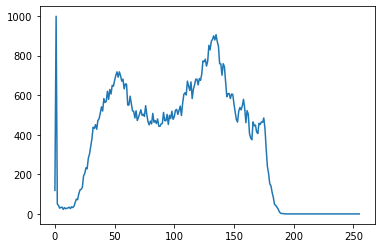

In [11]:
import cv2 
from matplotlib import pyplot as plt 
img = cv2.imread('E:/DataSetCovid/COVID-19_Radiography_Dataset/COVID/COVID-169.png',0) 
histr = cv2.calcHist([img],[0],None,[256],[0,256]) 
plt.plot(histr) 
plt.show()

-  Os histogramas podem ser utilizados para fins de reconhecimento de padrões;
- Técnicas de processamento com Histogramas
        -Ajuste de brilho e contraste
        -Equalização / Refinamento Imagem
        -Segmentação
        -Mapas de pseudocores

=====================================================================================================================================================================

## [Realizada na etapa anterior]. Preparação dos dados (Projeções)

   **Formato do CSV:**

|Índice|Imagem|featureFos|featureGlcm|featureGlcm|Category|
|:--:|:--:|:--:|:--:|:--:|:--:|
|0|nomeImagem.png|list [...]|list [...]|list [...]|Class|

  **Dimensionalidade dos dados:**



|featureFos|featureGlcm|featureLpq|
|:--:|:--:|:--:|
|16|28|255|

*  Dois DataSet foram utilizados
    *  KAGGLE_dataset_texture_features_raiox.csv
    *  HCFMRP_dataset_texture_features_raiox.csv


### (def split_data): 
Inicialmente, os valores estavam sendo considerados como uma string. Portanto foi necessario remover os colchetes com o [1:-1] e fazer o split dos dados
#### Retorna os dados extraidos em formato de lista


In [12]:
def split_data(input, feature_name, size):
    image_ids = []
    image_features = []
    image_categories = []
    for i in range(size):
        
        x = [ float(v) for v in input.iloc[i][feature_name][1:-1].split(", ") ] 
        x = np.array(x)
        image_features.append(x)
        image_ids.append(input.iloc[i].Image)
        image_categories.append(input.iloc[i].Category)
    return image_ids, image_features, image_categories

* Leitura do Dataset

In [13]:
#Leitura do Dataset
input = pd.read_csv("HCFMRP_dataset_texture_features_raiox.csv")

* Contagem da quantidade de imagens para cada classe

In [14]:
#print("\nDataset com 2 classes:")
print(input["Category"].value_counts())

normais    381
covid      199
Name: Category, dtype: int64


* Atualizando indices (Removendo os 'furos' dos drops)

In [15]:
input = input.reset_index()
input = input.drop('index', axis=1)
input

,Image,featureFos,featureGlcm,featureLpq,Category
0,png_file1.png,"[159.73137678198538, 3353.0641194236914, 174.0...","[0.0008512439438940027, 53.29101558467067, 0.9...","[0.002609232489603839, 0.0023646169437034795, ...",covid
1,png_file10.png,"[147.37609277959123, 3381.9115392909216, 151.0...","[0.0014388223415054205, 36.65331393257317, 0.9...","[0.0020151661638458224, 0.0021549464757888853,...",covid
2,png_file100.png,"[133.70682040447412, 3046.9665689018298, 146.0...","[0.0012355290889578155, 45.148716767405844, 0....","[0.0023413202250463024, 0.0018287924145884051,...",covid
3,png_file101.png,"[102.65635647800579, 1575.218839566936, 104.0,...","[0.0009779764177579586, 30.509819339844135, 0....","[0.0032964856899905647, 0.002352968584374891, ...",covid
4,png_file102.png,"[154.92156823266663, 1814.0330514952689, 153.0...","[0.0008598571923598621, 29.041498227935243, 0....","[0.0022830784284033592, 0.001432748197416394, ...",covid
...,...,...,...,...,...
575,95.png,"[169.438482308506, 2772.077470681234, 185.0, 2...","[0.0011789511791429575, 49.753104672738395, 0....","[0.0031334086593903247, 0.0019569243672028793,...",normais
576,96.png,"[119.18846896260098, 3987.784415150261, 126.0,...","[0.0003185674747234916, 64.27475332274557, 0.9...","[0.04556838169343848, 0.0021083530384745307, 0...",normais
577,97.png,"[167.244904529076, 2451.503552696221, 180.0, 2...","[0.0008050225684180619, 51.857787579697145, 0....","[0.0023180235063891253, 0.002259781709746182, ...",normais
578,98.png,"[147.8529951084023, 5641.144581291419, 172.0, ...","[0.0011080768510293563, 73.31965968594662, 0.9...","[0.12541788489091313, 0.0018287924145884051, 0...",normais


* Definindo as features e as funcoes de distancia

In [16]:

feature_names = ["featureFos", "featureGlcm","featureLpq"] #[f for f in input.columns[1:-1]]
distance_functions = ["euclidean", "cosine", "manhattan"] 
seed = 42 #Semente de entrada para execucao das Tecnicas de Projecao Multidimensional
distance_matrix_output = False #Ativa/Desativa a geracao dos arquivos contendo matrizes de dissimilaridade

#Numero de instancias do dataset
size = input.shape[0]
print("Total de imagens: ", size)

print("\Dimensionalidades das Features: ")
#Obtendo as features
image_ids = {}; image_features = {}; image_categories  = {};
for feature_name in feature_names:
    ids, features, categories = split_data(input, feature_name, size)
    print(feature_name, len(features[0]))
    image_ids[feature_name] = ids
    image_features[feature_name] = features
    image_categories[feature_name] = categories

Total de imagens:  580
\Dimensionalidades das Features: 
featureFos 16
featureGlcm 28
featureLpq 255


 -----------------------------------------------------------------------------------------------------------------------------------------------------------

#####  Na sequência os dados que possuem diferentes dimensionalidades [16, 28, 255] , passam por um processamento para  reducação de dimensionalidade. Com intuito de preparar os dados para visualização. Logo foram utilizada 3 diferentes técnicas. 
 - TSNE
 - MDS
 - PCA
 
##### Todas as técnicas utilizaram a reducão de componentes, ou seja, atributos para N = 2. 
##### Para o calulo da função distâncias, foram utilizadas três funções de distância:
   - Euclidean
   - Cosine
   - Manhattan

##### Como temos 3 diferentes featues para analisar:
   - featureFos
   - featureGlcm
   - featureGlcm


##### Desta forma teremos (3x3x3) 29 combinações:
- (1) t-SNE: distance_function=**euclidean**, feature=**featureFos**
- (1) MDS: distance_function=**euclidean**, feature=featureFos
- (1) PCA: distance_function=**euclidean**, feature=featureFos
* (2) t-SNE: distance_function=**euclidean**, feature=**featureGlcm**
* (2) MDS: distance_function=**euclidean**, feature=featureGlcm
* (2) PCA: distance_function=**euclidean**, feature=featureGlcm
* ......
* (9) t-SNE: distance_function=**manhattan**, feature=**featureLpq**
* (9) MDS: distance_function=manhattan, feature=featureLpq
* (9) PCA: distance_function=manhattan, feature=featureLpq



#### O retorno é um dicionário para cada técnica : tsne_coord = {}; mds_coord = {}; pca_coord

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances

#Example: http://techflare.blog/3-ways-to-do-dimensionality-reduction-techniques-in-scikit-learn/
import warnings; warnings.simplefilter('ignore') # Desativando Warning simples para facilitar visualização dos outputs 

#Gerando a matriz de distancias para todas as funcoes definidas em "distance_functions"
tsne_coord = {}; mds_coord = {}; pca_coord = {}; exec = 1;
for distance_function in distance_functions:
    for feature_name in feature_names:
        X = image_features[feature_name]
        X_normalized = StandardScaler().fit(X).transform(X)
        info = pairwise_distances(X_normalized, Y=None, metric=distance_function) #Distance Matrix

        #Gerando as matrizes de dissimilaridade (distancia)
        if distance_matrix_output == True:
            output = pd.DataFrame(info)
            output["Image"]    = image_ids[feature_name]
            output["Category"] = image_categories[feature_name]
            output_name =  str(exec) + "-" + distance_function + "_" + feature_name + ".csv"
            output.to_csv(output_name, index=False)  

        #Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
        print("(" + str(exec) + ") Executando t-SNE: distance_function=" + distance_function + ", feature=" + feature_name)
        matrix_2d_tsne = TSNE(n_components=2, perplexity=1.8, metric="precomputed", random_state=seed,square_distances = True).fit_transform(info)
        proj_tsne = pd.DataFrame(matrix_2d_tsne)
        proj_tsne.columns = ["x", "y"]
        proj_tsne["Image"]    = image_ids[feature_name]
        proj_tsne["Category"] = image_categories[feature_name]
        tsne_coord[distance_function + " - " + feature_name] = proj_tsne

        #Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html
        print("(" + str(exec) + ") Executando MDS: distance_function=" + distance_function + ", feature=" + feature_name)
        matrix_2d_mds = MDS(n_components=2, dissimilarity='precomputed', random_state=seed).fit_transform(info)
        proj_mds = pd.DataFrame(matrix_2d_mds)
        proj_mds.columns = ["x", "y"]
        proj_mds["Image"]    = image_ids[feature_name]
        proj_mds["Category"] = image_categories[feature_name]
        mds_coord[distance_function + " - " + feature_name] = proj_mds

        #Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
        print("(" + str(exec) + ") Executando PCA: distance_function=" + distance_function + ", feature=" + feature_name)
        matrix_2d_pca = PCA(n_components=2, random_state=seed).fit_transform(info)
        proj_pca = pd.DataFrame(matrix_2d_pca)
        proj_pca.columns = ["x", "y"]
        proj_pca["Image"]    = image_ids[feature_name]
        proj_pca["Category"] = image_categories[feature_name]
        pca_coord[distance_function + " - " + feature_name] = proj_pca

        exec += 1

(1) Executando t-SNE: distance_function=euclidean, feature=featureFos
(1) Executando MDS: distance_function=euclidean, feature=featureFos
(1) Executando PCA: distance_function=euclidean, feature=featureFos
(2) Executando t-SNE: distance_function=euclidean, feature=featureGlcm
(2) Executando MDS: distance_function=euclidean, feature=featureGlcm
(2) Executando PCA: distance_function=euclidean, feature=featureGlcm
(3) Executando t-SNE: distance_function=euclidean, feature=featureLpq
(3) Executando MDS: distance_function=euclidean, feature=featureLpq
(3) Executando PCA: distance_function=euclidean, feature=featureLpq
(4) Executando t-SNE: distance_function=cosine, feature=featureFos
(4) Executando MDS: distance_function=cosine, feature=featureFos
(4) Executando PCA: distance_function=cosine, feature=featureFos
(5) Executando t-SNE: distance_function=cosine, feature=featureGlcm
(5) Executando MDS: distance_function=cosine, feature=featureGlcm
(5) Executando PCA: distance_function=cosine, fe

#### A definição do dicionário é dado por:
- Exemplo para distância euclidiana para featyureFos
    - Key: euclidean - featureFos
    - values:    
|x|y|Image|Category
|:--:|:--:|:--:| :--:|
|Componente 1|Componente 2|Nome imagem.png| Classe| 
        

In [18]:
tsne_coord

{'euclidean - featureFos':              x          y            Image Category
 0   -73.366753  41.812515    png_file1.png    covid
 1   -18.311506 -16.644497   png_file10.png    covid
 2   -30.812397 -22.154877  png_file100.png    covid
 3   -40.534626  26.323320  png_file101.png    covid
 4     3.536956  33.597782  png_file102.png    covid
 ..         ...        ...              ...      ...
 575 -42.405018  43.004078           95.png  normais
 576 -32.285133  -6.954134           96.png  normais
 577 -42.823326  79.521538           97.png  normais
 578  16.507187  78.900337           98.png  normais
 579  32.165604  11.906096           99.png  normais
 
 [580 rows x 4 columns],
 'euclidean - featureGlcm':              x          y            Image Category
 0    35.703754 -25.776772    png_file1.png    covid
 1    27.500332 -41.809296   png_file10.png    covid
 2    16.071476  10.455806  png_file100.png    covid
 3   -10.722109 -28.757374  png_file101.png    covid
 4     4.274541 -42

# 2.  Preparação e visualização dos dados (Projeções)

Pelo formato dos nossos dados, todos os dados são do tipo númericos, com diferentes dimensões(atributos): 
 - 16, 28, 255 para as respectivas features FOS, GLCM e	LPQ. 
 - Seguindo as especificações do "From Data To Viz":
     - Numeric --> Several Numeric --> Not Ordered --> Correlogram --> Scatterplot
 - Foram aplicadas 3 técnicas de projeções multidimênsional(PCA, t-SNE e MDS). Com intuito de reduzir a dimensionalidade e mostrar ao usuário uma informação exploratória sobre composição dos dados e principalmente visualizar a separabilidade entre os os objetos, que pertecem a diferentes classes(Covid, Normais).
 -  A intenção nesta fase exploratória é fornecer ao usário alguns "insights" sobre qual extrator, projeção e função de distância é mais adequado e que obtém  melhores resultados no processo de classificação a posteriori.
 -  Importante lembrar que também serão utilizadas métricas quantitativas, para validar as afirmações, tais como: Acurácia dos classificadores, Silhouette das projeções. 

In [31]:
#Cria o Scatterplot para todas as variacoes da tecnica de reducao de dimensionalidade desejada
def projection(proj_data, technique, distance_functions, feature_names):
    #Definindo o tamanho das figuras
    rows = len(distance_functions)
    cols = len(feature_names)
    height = 4*rows
    width  = 4*cols

    fig, axs = plt.subplots(rows, cols, figsize=(width, height))
    fig.subplots_adjust(
        left   = 0.1, # o lado esquerdo dos subplots da figura
        right  = 0.9,   # o lado direito dos subplots da figura
        bottom = 0.1,   # a parte inferior dos subplots da figura
        top    = 0.9,   # o topo dos subplots da figura
        wspace = 0.4,   # a quantidade de largura reservada para o espaço em branco entre subplots
        hspace = 0.6    # a quantidade de altura reservada para o espaço em branco entre subplots
    )

    r=0
    for distance_function in distance_functions:
        c=0
        for feature_name in feature_names:
            sns.scatterplot(data=proj_data[distance_function + " - " + feature_name], x="x", y="y", hue="Category", ax=axs[r,c])
            axs[r,c].legend(loc="lower center", bbox_to_anchor=(0.5, -0.50))
            axs[r,c].set_title(technique + " - " + distance_function + " - " + feature_name)
            c+=1
        r+=1
    fig.savefig("image-pca.png")

## Projeção Visual t-SNE

<class 'NoneType'>


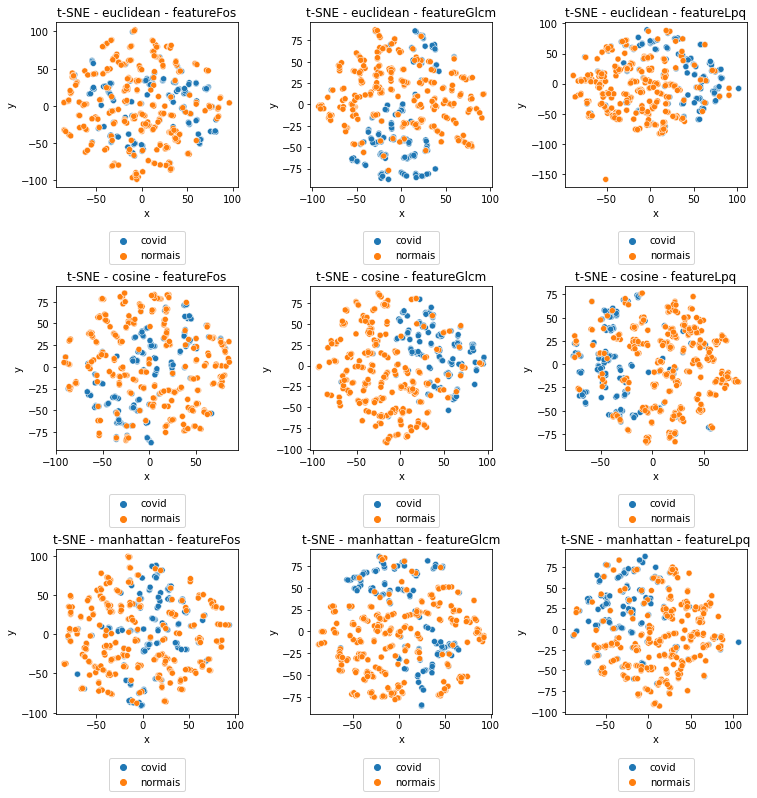

In [28]:
#Executando as tecnicas de projecao multidimensional (t-SNE)
print(type(projection(tsne_coord, "t-SNE", distance_functions, feature_names)))

## Projeção Visual MDS

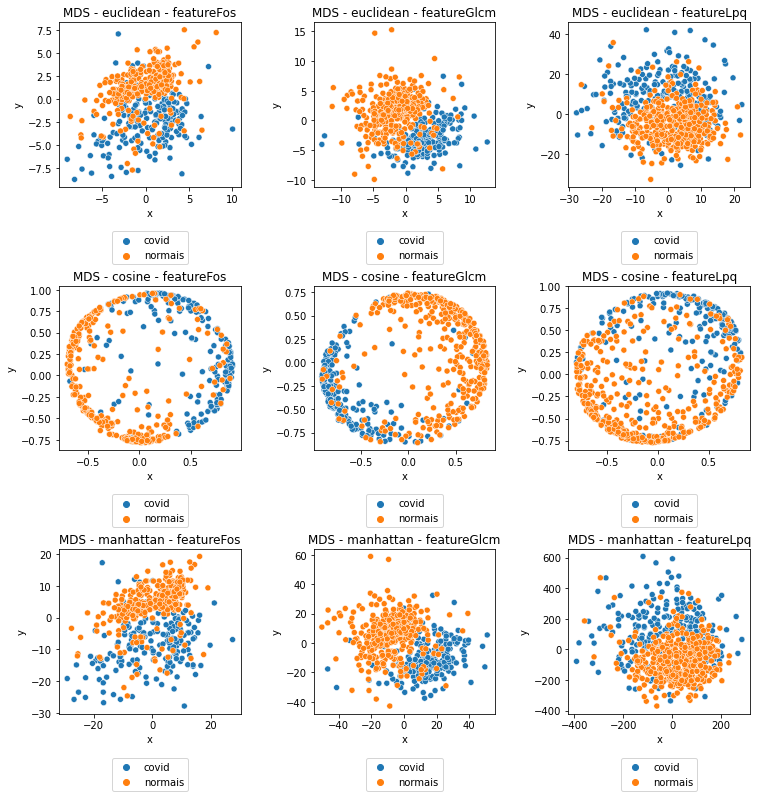

In [30]:
#Executando as tecnicas de projecao multidimensional (MDS)
projection(mds_coord, "MDS", distance_functions, feature_names)


## Projeção Visual PCA

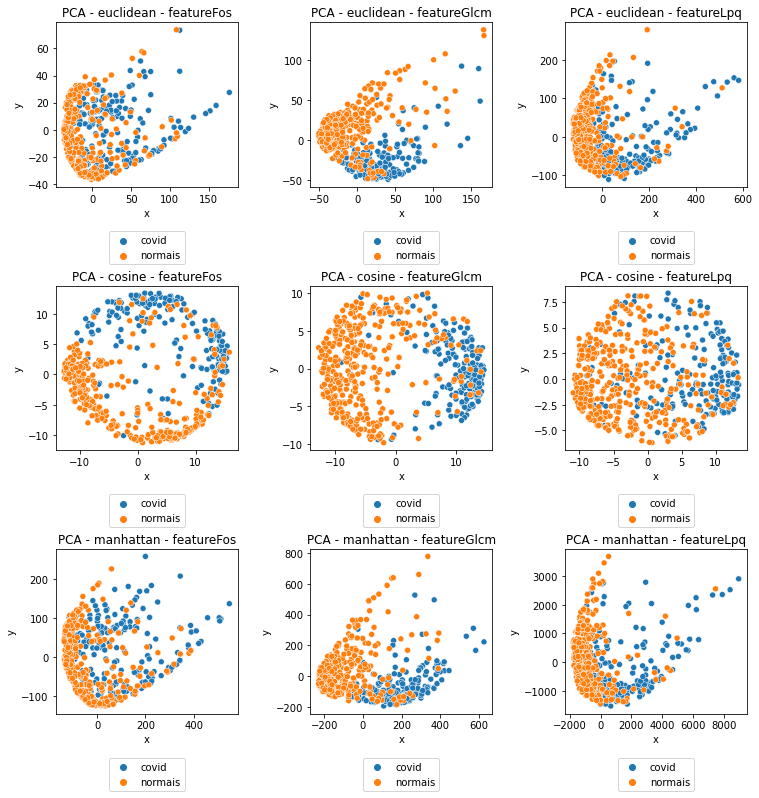

In [32]:
projection(pca_coord, "PCA", distance_functions, feature_names)

#### Visualmente podemos ter alguns insights a  partir da visualização fornecidas pelas diferentes projeções permutando com diferentes funções de distância é possivel estar analisando previamente, qual (extrator, projeção e função de distância) apresenta melhor separabilidade dos dados: 

- De maneira geral o GLCM aparenta dividir melhor as classes do conjunto de dados. As demais features demostram ter mais sobreposições dos dados, ou até mesmo não visualizando um corte linear entre as classes. 
- Em relação a projeção: o MDS aparenta maior separabilidade quando é observado entre todos os extratores e com as diferentes funções de distâncias. 
- No entanto, o PCA quando utiliza a função de distância do cosseno também aparenta ter um bom resultado. 
- E no geral a distância de cosseno aparenta fornecer melhores resultados. 
- A exploração das técnicas visuais podem nos auxiliar em contextos, nos quais não conhecemos o nosso conjunto de dados, além de observar o comportamento dos extratores. 
- Um seguinte passo, seria confrontar os insights levantados com a métrica de silhouette e até mesmo com os resultados obtidos pelos classificadores. 



